## Secondary analysis of a sample tested positive to the sapovirus GI.1 during a non-foodborne outbreak in Miyagi-Japan

This is a secondary analysis, following initial analysis aiming at obtaining the consensus sequence. After getting the consensu sequence using a GenBank reference, this time, we will determine the mutations in reads, with reference to the the 2013k9 outbreak consensus sequence

In [37]:
import os
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped/2015k4/4_japan")

### 1-index reference for mapping

In [38]:
%%bash
# index ref
bwa index cons_2015k4.fa

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index cons_2015k4.fa
[main] Real time: 0.621 sec; CPU: 0.009 sec


### 2-Map reads to reference

In [39]:
%%bash
bwa mem -t 32  cons_2015k4.fa  *R1_001.fastq.gz *R2_001.fastq.gz | samtools view -b -F 4 -F 2048 | samtools sort -o 4_japan_GI.1_a.sorted.bam
echo "mapping completed"

mapping completed


[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 1222684 sequences (157402932 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (122, 578513, 123, 129)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (888, 1686, 2798)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 6618)
[M::mem_pestat] mean and std.dev: (1994.64, 1456.32)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 8528)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (74, 114, 169)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 359)
[M::mem_pestat] mean and std.dev: (127.05, 68.44)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 454)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (266, 1048, 3015)
[M::mem_pestat] lo

In [40]:
%%bash
ls

4_japan_GI.1_a.sorted.bam
4_japan_re_GI.1_final.tsv
4_S4_L001_R1_001.fastq.gz
4_S4_L001_R2_001.fastq.gz
cons_2015k4.fa
cons_2015k4.fa.amb
cons_2015k4.fa.ann
cons_2015k4.fa.bwt
cons_2015k4.fa.pac
cons_2015k4.fa.sa
cons_2015k4.gff
Primalprimers_SaVGI.1_batch2_ok.fa
Primal-primers_SaVGI.1pairs_ok.tsv
script-ivar-4_japan.sh


In [41]:
%%bash
samtools flagstat 4_japan_GI.1_a.sorted.bam

1167767 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
1167767 + 0 mapped (100.00% : N/A)
1167767 + 0 paired in sequencing
584392 + 0 read1
583375 + 0 read2
1155928 + 0 properly paired (98.99% : N/A)
1162590 + 0 with itself and mate mapped
5177 + 0 singletons (0.44% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


### 3-Let's now trim-off the primer sequences using ivar. 
In order to do this we need three files: (1) a BED file with primer coordinates. We will generate this by aligning the primer sequences to the reference sequence and then using bedtools to create the BED file. We also neet (2) Aligned and (3) sorted BAM file generate in the previous step.


In [42]:
# map primers to the reference genome to identify primers coordinates

In [43]:
%%bash
bwa mem -k 5 -T 16 cons_2015k4.fa Primalprimers_SaVGI.1_batch2_ok.fa  | samtools view -b -F 4 > Primalprimers_SaVGI.1_batch2_ok.fa.bam
bedtools bamtobed -i Primalprimers_SaVGI.1_batch2_ok.fa.bam > 4_japan_GI.1_primers.bed
echo "bed file with primers locations on reference sequence generated"

bed file with primers locations on reference sequence generated


[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 68 sequences (1520 bp)...
[M::mem_process_seqs] Processed 68 reads in 0.014 CPU sec, 0.014 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem -k 5 -T 16 cons_2015k4.fa Primalprimers_SaVGI.1_batch2_ok.fa
[main] Real time: 0.016 sec; CPU: 0.017 sec


In [44]:
# We will now use this BED file as input to ivar to trim primer sequences

# Note that this BED file has to be generated only once for a reference sequence.

In [45]:
%%bash
ivar trim -b 4_japan_GI.1_primers.bed -p 4_japan_GI.1.trimmed -i 4_japan_GI.1_a.sorted.bam
echo "primers trimming complete"

# Sort and index trimmed BAM file.
samtools sort -o 4_japan_GI.1.trimmed.sorted.bam 4_japan_GI.1.trimmed.bam ; samtools index 4_japan_GI.1.trimmed.sorted.bam
echo "Sorted and indexed trimmed BAM file"


Found 58 primers in BED file
Amplicons detected: 
Building BAM index

Number of references in file: 1
cons_2015k4
Using Region: cons_2015k4

Found 1167767 mapped reads
Found 0 unmapped reads
Sorted By Coordinate
-------
Processed 10% reads ... 
Processed 20% reads ... 
Processed 30% reads ... 
Processed 40% reads ... 
Processed 50% reads ... 
Processed 60% reads ... 
Processed 70% reads ... 
Processed 80% reads ... 
Processed 90% reads ... 
Processed 100% reads ... 

-------
Results: 
Primer Name	Read Count
KTESAVG11_1_LEFT	0
KTESAVG11_1_RIGHT	1603
KTESAVG11_2_LEFT	1273
KTESAVG11_3_RIGHT	4
KTESAVG11_4_LEFT	759
KTESAVG11_4_RIGHT	1825
KTESAVG11_5_LEFT	2955
KTESAVG11_5_RIGHT	1921
KTESAVG11_6_RIGHT	844
KTESAVG11_7_LEFT	1261
KTESAVG11_8_LEFT	2678
KTESAVG11_8_RIGHT	5543
KTESAVG11_9_LEFT	4878
KTESAVG11_9_RIGHT	3624
KTESAVG11_11_LEFT	4854
KTESAVG11_11_RIGHT	5576
KTESAVG11_12_RIGHT	6808
KTESAVG11_13_LEFT	6677
KTESAVG11_13_RIGHT	9728
KTESAVG11_14_LEFT	3123
KTESAVG11_14_RIGHT	2224
KTESAVG11_15_RI

In [46]:
%%bash
samtools flagstat 4_japan_GI.1.trimmed.sorted.bam

329025 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
329025 + 0 mapped (100.00% : N/A)
329025 + 0 paired in sequencing
168900 + 0 read1
160125 + 0 read2
327373 + 0 properly paired (99.50% : N/A)
328163 + 0 with itself and mate mapped
862 + 0 singletons (0.26% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


### 4-Let's quicky take a look at the depth of the trimmed vs untrimmed BAM file. We'll extract the depth using the samtools depth command.


In [47]:
%%bash
mkdir depth
samtools depth -a 4_japan_GI.1.trimmed.sorted.bam > depth/4_japan_GI.1.trimmed.sorted.bam.depth ; samtools depth -a 4_japan_GI.1_a.sorted.bam > depth/4_japan_GI.1.sorted.bam.depth
echo "Please plot the depth per position"

Please plot the depth per position


In [48]:
## Plot of the depth per position

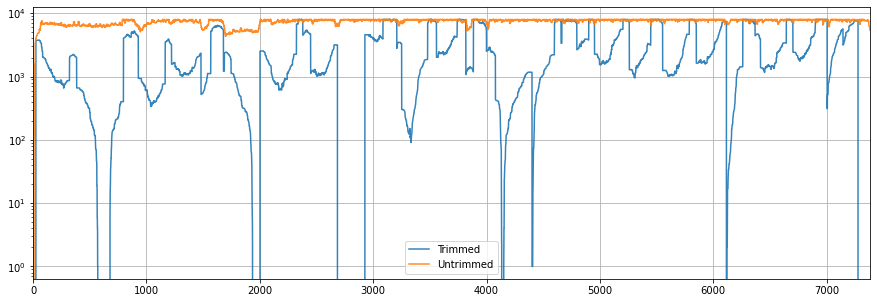

In [49]:
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped/2015k4/4_japan/depth")
import pandas as pd
import matplotlib.pyplot as plt
df_trimmed = pd.read_csv("4_japan_GI.1.trimmed.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos", "depth_t"])
df_untrimmed = pd.read_csv("4_japan_GI.1.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos", "depth_unt"])

ax = df_trimmed["depth_t"].plot(logy=True, label = "Trimmed", figsize = (15,5), alpha = 0.9)
df_untrimmed["depth_unt"].plot(logy=True, ax = ax, label ="Untrimmed", alpha=0.9)
plt.legend()
plt.grid()
plt.show()

### 5-Let us identify primer sequences that might have a mismatch with the consensus sequence to ensure that we remove reads from any amplicons derived from those primers; Otherwise, it might bias the iSNV frequency due to varying primer binding effeciency

In [50]:
#To that end, we have to : 

#Call consensus on merged BAM file (If the sequencing of each technical replicate was done separately).

#Align primer sequences to consensus after creating a bwa index from the consensus sequence called.

In [51]:
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped/2015k4/4_japan")

In [52]:
%%bash
# a-call consensus
samtools mpileup -A -d 0 -Q 0 4_japan_GI.1.trimmed.sorted.bam  | ivar consensus -p 4_japan_GI.1.consensus
echo "consensus called on BAM file."


Minimum Quality: 20
Threshold: 0
Minimum depth: 10
Regions with depth less than minimum depth covered by: N
Reference length: 6820
Positions with 0 depth: 0
Positions with depth below 10: 29
consensus called on BAM file.


[mpileup] 1 samples in 1 input files
[mpileup] Max depth set to maximum value (2147483647)


In [53]:
%%bash
# Map primers to the indexed consensus sequence
bwa index -p 4_japan_GI.1.consensus 4_japan_GI.1.consensus.fa
bwa mem -k 5 -T 16 4_japan_GI.1.consensus Primalprimers_SaVGI.1_batch2_ok.fa  | samtools view -bS -F 4 | samtools sort -o 4_japan_GI.1_primers_consensus.bam

echo "primers mapped to consensus"

primers mapped to consensus


[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index -p 4_japan_GI.1.consensus 4_japan_GI.1.consensus.fa
[main] Real time: 0.471 sec; CPU: 0.009 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 68 sequences (1520 bp)...
[M::mem_process_seqs] Processed 68 reads in 0.018 CPU sec, 0.017 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem -k 5 -T 16 4_japan_GI.1.consensus Primalprimers_SaVGI.1_batch2_ok.fa
[main] Real time: 0.020 sec; CPU: 0.021 sec


In [54]:
%%bash
samtools mpileup -A -d 0 --reference 4_japan_GI.1.consensus.fa -B -Q 0 4_japan_GI.1_primers_consensus.bam | ivar variants -p 4_japan_GI.1_primers_consensus_1
echo "iSNVs on this initial BAM (without removal of reads from mismached primers) called at a minimum threshold of 3%"

A GFF file containing the open reading frames (ORFs) has not been provided. Amino acid translation will not be done.
A reference sequence has not been supplied. Amino acid translation will not be done.
iSNVs on this initial BAM (without removal of reads from mismached primers) called at a minimum threshold of 3%


[mpileup] 1 samples in 1 input files
[mpileup] Max depth set to maximum value (2147483647)


In [55]:
%%bash
# Let's now get the indices of primers with mismtaches and their respective pairs. To get the pair information, we need a tsv file with two columns to represent the pairs of primers. This file is at pair_information.tsv
bedtools bamtobed -i 4_japan_GI.1_primers_consensus.bam > 4_japan_GI.1_primers_consensus.bam.bed ; ivar getmasked -i 4_japan_GI.1_primers_consensus_1.tsv -b 4_japan_GI.1_primers_consensus.bam.bed -f Primal-primers_SaVGI.1pairs_ok.tsv -p primer_mismatchers_indices
echo "you got the indices of primers with mismtaches and their respective pairs"

Found 51 primers in BED file
Primer pair for KTESAVG11_2_LEFT not found in BED file.
Primer pair for KTESAVG11_4_LEFT not found in BED file.
Primer pair for KTESAVG11_5_LEFT not found in BED file.
Primer pair for KTESAVG11_7_LEFT not found in BED file.
Primer pair for KTESAVG11_9_LEFT not found in BED file.
Primer pair for KTESAVG11_11_RIGHT not found in BED file.
Primer pair for KTESAVG11_12_RIGHT not found in BED file.
Primer pair for KTESAVG11_13_RIGHT not found in BED file.
Primer pair for KTESAVG11_14_RIGHT not found in BED file.
Primer pair for KTESAVG11_15_RIGHT not found in BED file.
Primer pair for KTESAVG11_16_RIGHT not found in BED file.
Primer pair for KTESAVG11_17_RIGHT not found in BED file.
Primer pair for KTESAVG11_18_RIGHT not found in BED file.
Primer pair for KTESAVG11_19_RIGHT not found in BED file.
Primer pair for KTESAVG11_20_RIGHT not found in BED file.
Primer pair for KTESAVG11_22_RIGHT not found in BED file.
Primer pair for KTESAVG11_23_RIGHT not found in BED f

### 6- Let's omit reads from mismatched primers (Masking)

In [56]:
%%bash
ivar removereads -i 4_japan_GI.1.trimmed.sorted.bam -p 4_japan_GI.1.bad_are_masked.bam -t primer_mismatchers_indices.txt -b 4_japan_GI.1_primers.bed
echo "you removed reads from mismatched primers"

Found 58 primers in BED file
Writing to 4_japan_GI.1.bad_are_masked.bam
Number of references: 1
Reference Name: cons_2015k4
Reference Length: 7384
Using Region: cons_2015k4
Sorted By Coordinate
Results:
94150 reads were removed.
you removed reads from mismatched primers


In [57]:
%%bash
samtools flagstat 4_japan_GI.1.bad_are_masked.bam

234875 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
234875 + 0 mapped (100.00% : N/A)
234875 + 0 paired in sequencing
120554 + 0 read1
114321 + 0 read2
233621 + 0 properly paired (99.47% : N/A)
234255 + 0 with itself and mate mapped
620 + 0 singletons (0.26% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [58]:
import os
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped/2015k4/4_japan")

In [59]:
%%bash
# let us take a look at the reads distribution before and after masking
samtools sort -o 4_japan_GI.1.bad_are_masked.sorted.bam 4_japan_GI.1.bad_are_masked.bam 
samtools depth -a 4_japan_GI.1.bad_are_masked.sorted.bam > depth/4_japan_GI.1.bad_are_masked.sorted.depth

# echo "Let's now call iSNVs from the BAMS without reads from the masked amplicons"

samtools mpileup -A -d 0 --reference cons_2015k4.fa -B -Q 0 4_japan_GI.1.bad_are_masked.sorted.bam | ivar variants -r cons_2015k4.fa -p 4_japan_GI.1_final -g cons_2015k4.gff -m 10 ; tput setaf 1 echo "analysis is completed"
echo "please exclude variants with depth <400 and count iSNV"

please exclude variants with depth <400 and count iSNV


[mpileup] 1 samples in 1 input files
[mpileup] Max depth set to maximum value (2147483647)


In [60]:
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/4_japan/depth")

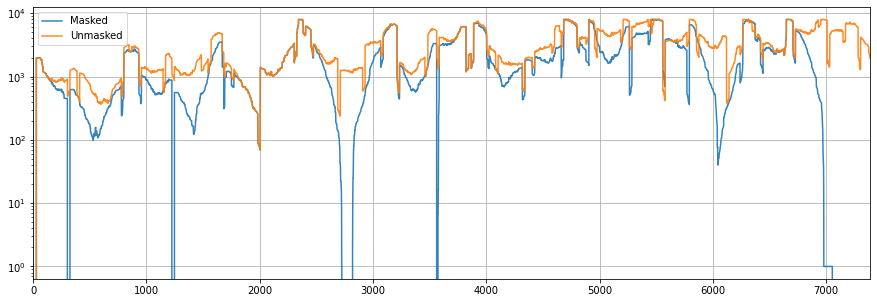

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
df_unmasked = pd.read_csv("4_japan_GI.1.trimmed.sorted.bam.depth", sep = "\t", names = ["Ref", "Pos", "depth_unmask"])
df_masked = pd.read_csv("4_japan_GI.1.bad_are_masked.sorted.depth", sep = "\t", names = ["Ref", "Pos", "depth_mask"])

ax = df_masked["depth_mask"].plot(logy=True, label = "Masked", figsize = (15,5), alpha = 0.9)
df_unmasked["depth_unmask"].plot(logy=True, ax = ax, label ="Unmasked", alpha=0.9)
plt.legend()
plt.grid()
plt.show()

#### 7- View Tables and Plots

In [62]:
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped/2015k4/4_japan")

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
rep_a = pd.read_csv("4_japan_GI.1_final.tsv", sep="\t")
rep_a["S_NS"] = np.where(rep_a["REF_AA"] == rep_a["ALT_AA"], "S", "NS")
rep_a.head()

,REGION,POS,REF,ALT,REF_DP,REF_RV,REF_QUAL,ALT_DP,ALT_RV,ALT_QUAL,ALT_FREQ,TOTAL_DP,PVAL,PASS,GFF_FEATURE,REF_CODON,REF_AA,ALT_CODON,ALT_AA,S_NS
0,cons_2015k4,30,T,C,3551,1642,37,121,57,37,0.032952,3672,1.946840e-33,True,NaN,GTT,V,GTC,V,S
1,cons_2015k4,258,A,-T,148,23,36,5,0,20,0.032468,154,1.070620e-01,False,NaN,NaN,NaN,NaN,NaN,NS
2,cons_2015k4,3060,A,T,119,41,52,3053,1091,51,0.962484,3172,0.000000e+00,True,NaN,ACA,T,ACT,T,S
3,cons_2015k4,7154,C,T,1635,383,63,470,149,61,0.223172,2106,1.654960e-219,True,NaN,CAC,H,CAT,H,S
4,cons_2015k4,7154,C,T,1635,383,63,470,149,61,0.223172,2106,1.654960e-219,True,NaN,CAC,H,CAT,H,S


In [64]:
rep_b=rep_a[rep_a['TOTAL_DP'] >= 400]
shape = rep_b.shape 
shape

(4, 20)

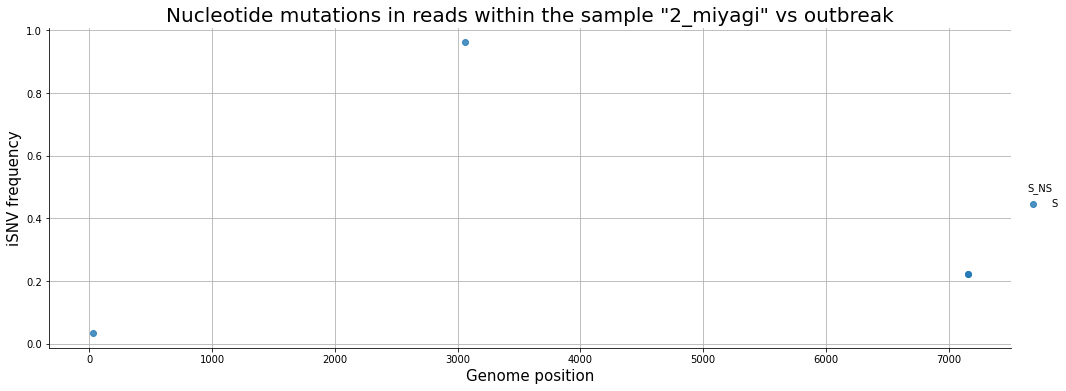

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
rep_b=rep_a[rep_a['TOTAL_DP'] >= 400]
sns.lmplot( x="POS", y="ALT_FREQ", data=rep_b, fit_reg=False, hue='S_NS',aspect=14/5, 
           legend=True, legend_out=True)
plt.xlabel('Genome position', fontsize=15)
plt.ylabel('iSNV frequency', fontsize=15)
plt.title('Nucleotide mutations in reads within the sample "2_miyagi" vs outbreak', fontsize=20)
plt.grid(axis="both")
plt.show()

In [66]:
# let us filter snps in non structural region [1-5099]
print("snps in non structural region")
print((rep_b[(rep_b['POS'] > 3610) & (rep_b['POS'] < 5099)]).shape)
# let us filter snps in complete capsid[5010-6800]
print("snps in capsid")
print((rep_b[(rep_b['POS'] > 5100) & (rep_b['POS'] < 7350)]).shape)

snps in non structural region
(0, 20)
snps in capsid
(2, 20)


In [67]:
# what percentage of this masked genome (without reads from mismached primers) has depth >400 ? 
os.chdir("/media/viro102/HD-ADU3/kte-data/sapo-ivar/test/outbreak_samples/GI.1/remapped/2015k4/4_japan/depth")

df_masked = pd.read_csv("4_japan_GI.1.bad_are_masked.sorted.depth", sep = "\t", names = ["Ref", "Pos", "depth_mask"])
df_masked['400cov'] = np.where(df_masked['depth_mask']>=400, 'yes', 'no')
df_masked['100cov'] = np.where(df_masked['depth_mask']>=100, 'yes', 'no')
df_masked.head()

,Ref,Pos,depth_mask,400cov,100cov
0,cons_2015k4,1,0,no,no
1,cons_2015k4,2,0,no,no
2,cons_2015k4,3,0,no,no
3,cons_2015k4,4,0,no,no
4,cons_2015k4,5,0,no,no


In [68]:
# What proportion of the genome is has a depth of coverage of at least >100 reads, >400 (Breadth ofcoverage)
my_tab1 = pd.crosstab(index=df_masked["100cov"],  # Make a crosstab
                              columns="Breadth 100coverage")      # Name the count column
my_tab2 = pd.crosstab(index=df_masked["400cov"],  # Make a crosstab
                              columns="Beadth above 400coverage")      # Name the count column
shape=df_masked.shape
print(shape)
print(my_tab1); print(my_tab2)

(7384, 5)
col_0   Breadth 100coverage
100cov                     
no                     1393
yes                    5991
col_0   Beadth above 400coverage
400cov                          
no                          2164
yes                         5220


In [72]:
5991/7359 * 100 # proportion of genome covered >400

81.41051773338769

In [71]:
5220/7359 * 100 # proportion of genome covered >100

70.93355075417855